## Validation-Curve

In [1]:
import pandas as pd

df = pd.read_csv("./classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
X = df[["age", "interest"]].values
y = df["success"].values

In [3]:
# Not actually needed - but sets a few
# parked Matplotlib properties to make the graphic
# is generated in a higher resolution
import helper

In [4]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

param_range = np.array([40, 30, 20, 15, 10, 8, 7, 6, 5, 4, 3, 2, 1])

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), 
    X,
    y,
    param_name = "n_neighbors",
    param_range=param_range)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [12]:
print(np.mean(test_scores, axis = 1))
print(test_scores)

[0.8788827  0.88228407 0.90588813 0.91922078 0.91575139 0.91905105
 0.91568405 0.90894936 0.91901738 0.90884629 0.91894798 0.88854119
 0.90558235]
[[0.88       0.84848485 0.90816327]
 [0.88       0.84848485 0.91836735]
 [0.89       0.88888889 0.93877551]
 [0.92       0.90909091 0.92857143]
 [0.93       0.90909091 0.90816327]
 [0.95       0.8989899  0.90816327]
 [0.95       0.88888889 0.90816327]
 [0.94       0.88888889 0.89795918]
 [0.96       0.88888889 0.90816327]
 [0.94       0.91919192 0.86734694]
 [0.95       0.92929293 0.87755102]
 [0.94       0.88888889 0.83673469]
 [0.94       0.87878788 0.89795918]]


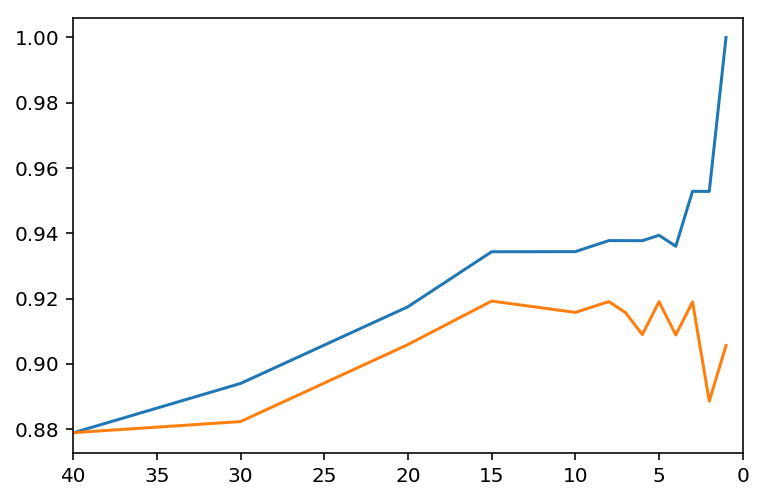

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

# This will reverse the X-axis, it now goes from 40 to 1.
plt.xlim(np.max(param_range), 0)

plt.show()